/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.5706 - loss: 1.2977 - val_accuracy: 0.9493 - val_loss: 0.1679
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9489 - loss: 0.1712 - val_accuracy: 0.9688 - val_loss: 0.1098
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9672 - loss: 0.1068 - val_accuracy: 0.9662 - val_loss: 0.1105
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9741 - loss: 0.0834 - val_accuracy: 0.9756 - val_loss: 0.0822
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9798 - loss: 0.0629 - val_accuracy: 0.9821 - val_loss: 0.0621
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9845 - loss: 0.0515 - val_accuracy: 0.9844 - val_loss: 0.0540
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9853 - loss: 0.0466 - val_accuracy: 0.9842 - val_loss: 0.0522
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9879 - loss: 0.03

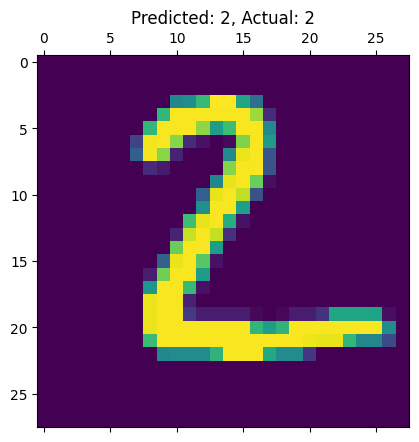

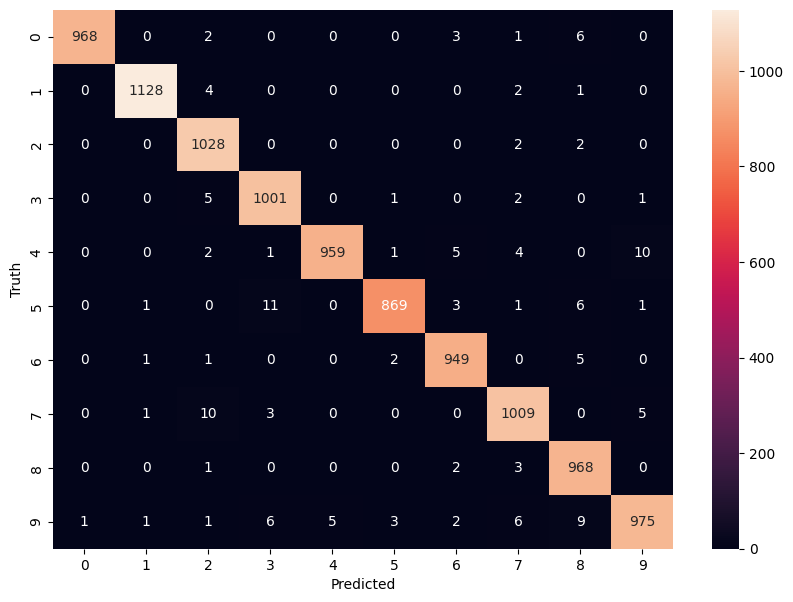

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.datasets import mnist
from sklearn.metrics import classification_report
from tabulate import tabulate

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data to fit LSTM input shape
timesteps, input_dim = x_train.shape[1], x_train.shape[2]
x_train = x_train.reshape(-1, timesteps, input_dim)
x_test = x_test.reshape(-1, timesteps, input_dim)

# Build and compile the LSTM model
model = Sequential([
    LSTM(128, activation='relu', input_shape=(timesteps, input_dim)),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate and predict
model.evaluate(x_test, y_test)
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

# Classification report for detailed metrics
report = classification_report(y_test, y_predicted_labels, output_dict=True)

# Prepare metrics table
metrics_table = [
    ["Accuracy", report["accuracy"]],
    ["Weighted Precision", report["weighted avg"]["precision"]],
    ["Weighted Recall", report["weighted avg"]["recall"]],
    ["Weighted F1-Score", report["weighted avg"]["f1-score"]]
]

# Display the metrics table
print(tabulate(metrics_table, headers=["Metric", "Value"], tablefmt="fancy_grid"))

# Visualize a sample test image and its prediction
index = 1  # Change the index to view other test images
plt.matshow(x_test[index].reshape(28, 28))  # Reshape back to original image dimensions
plt.title(f"Predicted: {y_predicted_labels[index]}, Actual: {y_test[index]}")
plt.show()

# Confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [ ]:
!pip install tensorflow matplotlib numpy seaborn scikit-learn tabulate